# Mental Health Prediction from Lifestyle Data
**Author**: Angelina Noel

**Course**: Data-4380

## Load & Preview Data

In [1]:
import pandas as pd
df = pd.read_csv('mental_health_data final data.csv')
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


## Data Exploration

In [2]:
#basic info
df.info()

#missing values
df.isnull().sum().sort_values(ascending=False)

#unique values
df.nunique().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  50000 non-null  int64  
 1   Age                      50000 non-null  int64  
 2   Gender                   50000 non-null  object 
 3   Occupation               50000 non-null  object 
 4   Country                  50000 non-null  object 
 5   Mental_Health_Condition  50000 non-null  object 
 6   Severity                 24998 non-null  object 
 7   Consultation_History     50000 non-null  object 
 8   Stress_Level             50000 non-null  object 
 9   Sleep_Hours              50000 non-null  float64
 10  Work_Hours               50000 non-null  int64  
 11  Physical_Activity_Hours  50000 non-null  int64  
 12  Social_Media_Usage       50000 non-null  float64
 13  Diet_Quality             50000 non-null  object 
 14  Smoking_Habit         

Medication_Usage               2
Consultation_History           2
Mental_Health_Condition        2
Diet_Quality                   3
Severity                       3
Stress_Level                   3
Gender                         4
Alcohol_Consumption            4
Smoking_Habit                  4
Occupation                     7
Country                        7
Physical_Activity_Hours       11
Age                           48
Work_Hours                    51
Social_Media_Usage            56
Sleep_Hours                   61
User_ID                    50000
dtype: int64

## Visualizations

### Distribution of Mental Health Conditions

This bar chart shows the number of participants who reported a mental health condition versus those who did not. It's useful for understanding the class balance of out target variable.

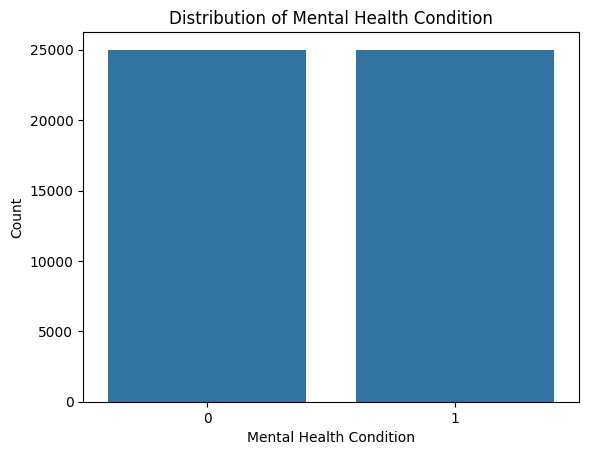

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Mental_Health_Condition')
plt.title('Distribution of Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

### Sleep Hours by Mental Health Condition

This boxplot compares how much people sleep depending on whether they reported a mental health condition. It's a good way to spot differences in sleep patterns between the two group.


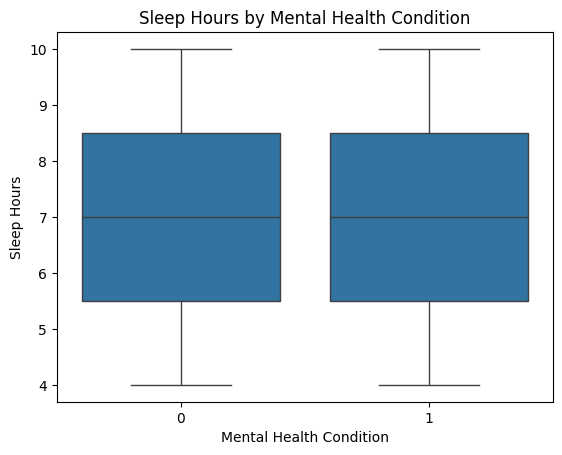

In [12]:
sns.boxplot(data=df, x='Mental_Health_Condition', y='Sleep_Hours')
plt.title('Sleep Hours by Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Sleep Hours')
plt.show()

### Feature Correlation Heatmap

This heatmap shows the pairwise correlations between all numeric features. Strong positive or negative values (closer to 1 or -1) may indicate predictive relationships.


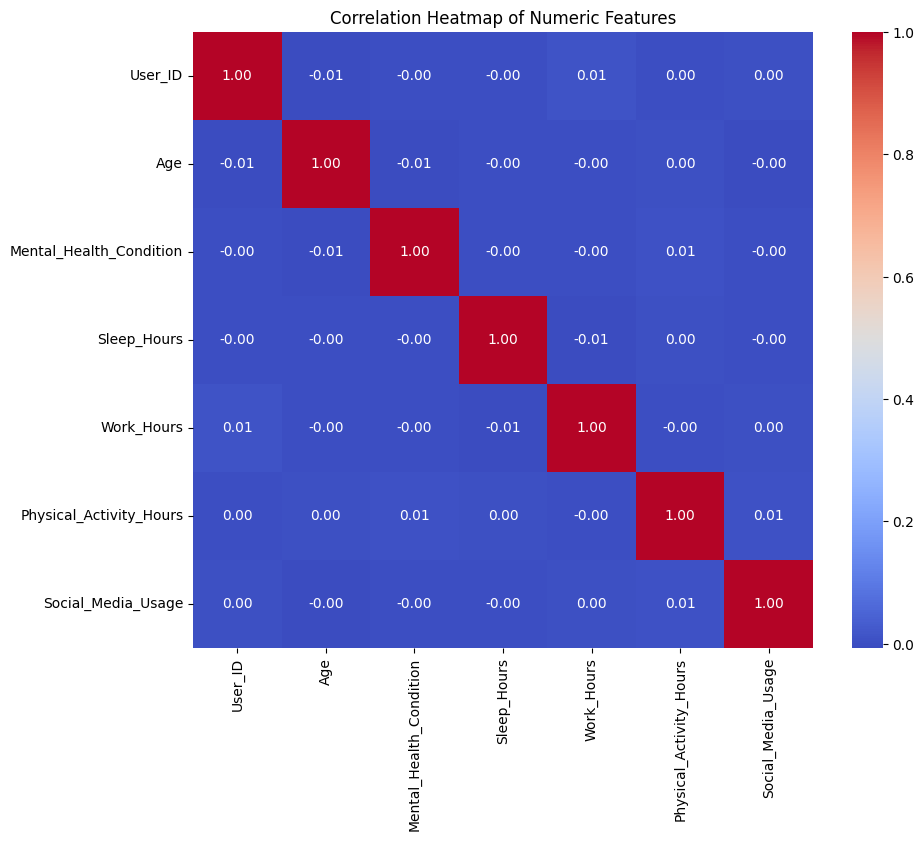

In [13]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Data preprocessing 

In [3]:
#show columns
df.columns

#target distribution 
df['Mental_Health_Condition'].value_counts()

#encode target
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].map({'Yes': 1, 'No':0})

#drop ID and define features/target
X = df.drop(columns=['User_ID', 'Mental_Health_Condition'])
y = df['Mental_Health_Condition']

#one-hot encoding
X = pd.get_dummies(X, drop_first=True)

## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model Training: Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation: Logistic Regression

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.497
Confusion Matrix:
 [[2627 2374]
 [2656 2343]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51      5001
           1       0.50      0.47      0.48      4999

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



## Model Training: Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Evaluation: Random Forest)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.4973
Confusion Matrix:
 [[2675 2326]
 [2701 2298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52      5001
           1       0.50      0.46      0.48      4999

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



## SHAP Analysis

In [15]:
print("SHAP values shape:", shap_values.values.shape)

SHAP values shape: (1000, 34, 2)


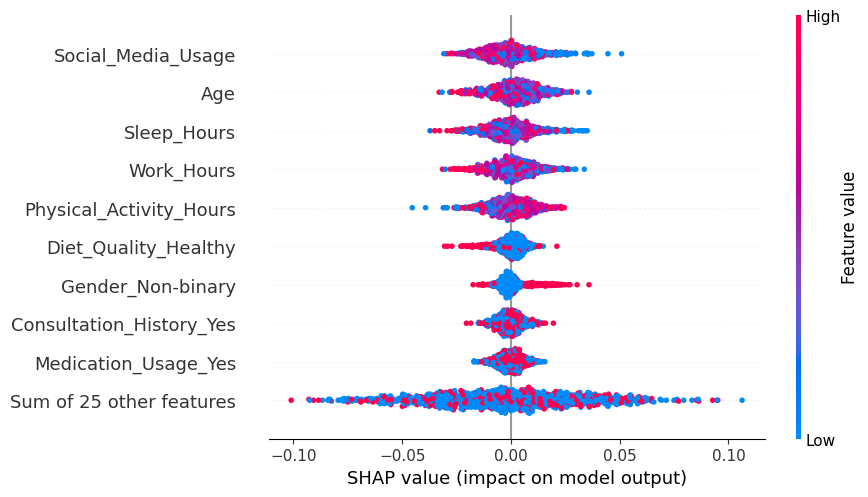

In [18]:
shap.plots.beeswarm(shap.Explanation(
    values=shap_values.values[:, :, 1],                # SHAP values for class 1
    base_values=shap_values.base_values[:, 1],         # base values for class 1
    data=shap_values.data,                             # input data
    feature_names=X_test.columns                       # feature labels
))

### Individual Prediction Explanations (SHAP Waterfall)

The waterfall plots below show how different features influenced the model's decision for specific individuals. Each bar represents a feature’s contribution toward pushing the prediction toward either "Yes" (mental health condition) or "No".

These personalized plots are valuable for understanding the exact reasoning behind predictions and identifying lifestyle factors associated with mental health risk.



Waterfall Plot for Sample #0


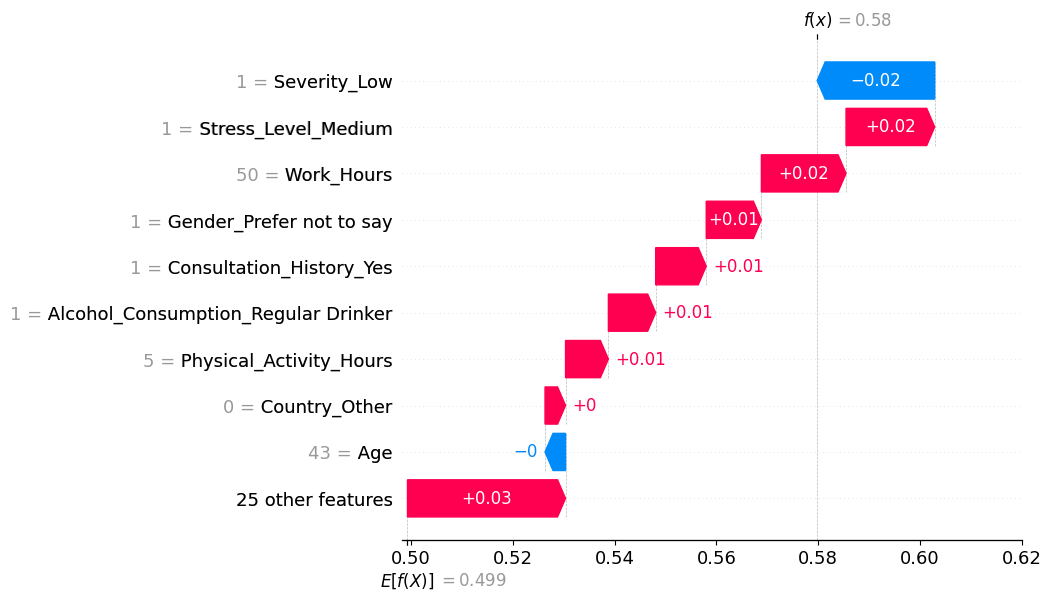


Waterfall Plot for Sample #1


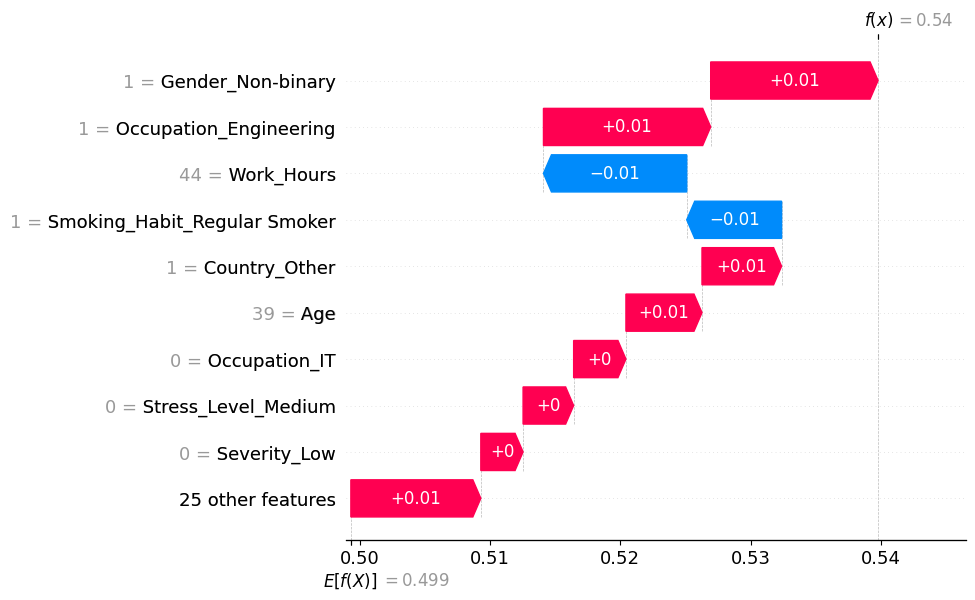


Waterfall Plot for Sample #2


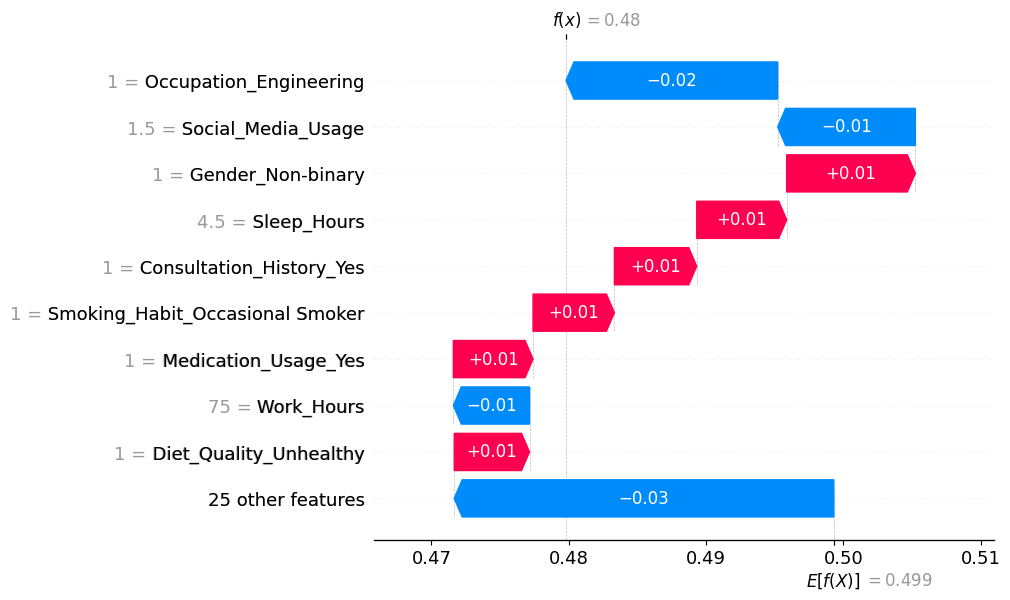


Waterfall Plot for Sample #3


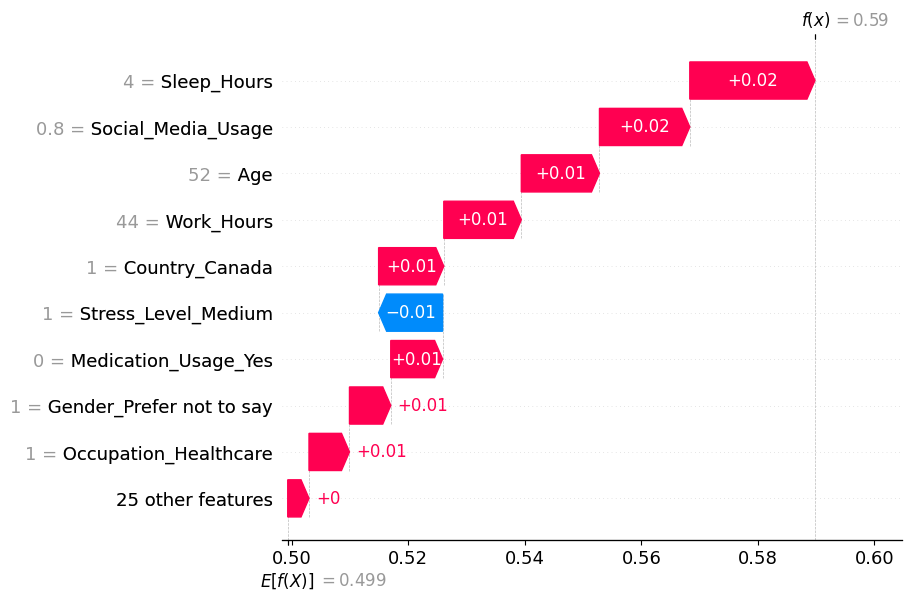


Waterfall Plot for Sample #4


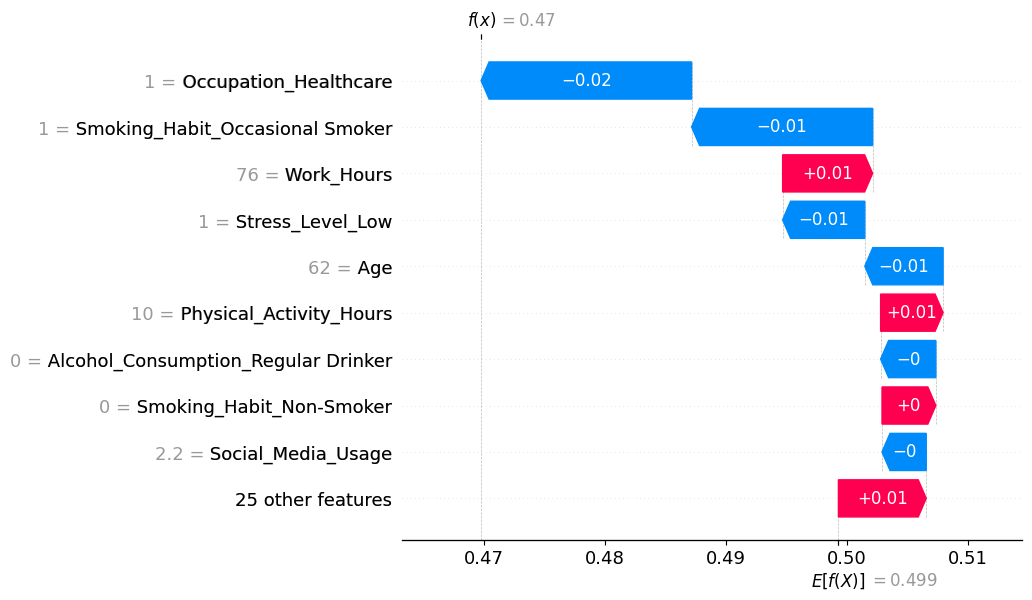

In [17]:
for i in range(5):  # Adjust range for more or fewer people
    single_explanation = shap.Explanation(
        values=shap_values.values[i, :, 1],               # SHAP values for class 1
        base_values=shap_values.base_values[i, 1],        # Base value for class 1
        data=shap_values.data[i],
        feature_names=X_test.columns
    )

    print(f"\nWaterfall Plot for Sample #{i}")
    shap.plots.waterfall(single_explanation)

## Conclusion

This project set out to predict the pressence of mental healthb conditions based on person's lifestyle factors - including sleep patterns, stress levels, physical activity, diet, and social media usage. After preprocessing and training both a Logistic Regression model and a Random Forest classifier, the predicitve accuracy hovered around 50%, indicating the complexity of using lifestyle data alone to predict mental health status.

To better understand the model's behavior, we applied SHAP (Shapley Additive Explanatations). SHAP visualizations, including beeswarm and waterfall plots, revealed that features such as **stress level**, **sleep hours**, **diet quality**, and **physical activity** had the strongest influence on the model's predicitions.

Although model performance was limited, this work highlights the potential of interpretable ML in the mental health space. Future improvements might involve collecting more granular or longitudinal data, incorporating text/survey responses, or combining this with psychological assessments.

Overall, this project demonstrates how data science can illuminate meaningful patterns in mental health and contribute to public health insights - even if prediciting mental wellness reamins a highly nuanced task.